In [153]:
import pandas as pd

bbbp_df = pd.read_csv('/Users/jagan/Downloads/BBBP_Descriptors/BBBP_df_revised.csv')

In [154]:
bbbp_df.head()

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


In [155]:
for col in bbbp_df.columns:
    print(col)

num
name
p_np
smiles


In [144]:
bbbp_df.shape

(2039, 4)

In [156]:
column_to_move = bbbp_df.pop('p_np')


bbbp_df.insert(3, 'p_np', column_to_move)

In [158]:
bbbp_df.head()

,num,name,smiles,p_np
0,1,Propanolol,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,1
1,2,Terbutylchlorambucil,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,1
2,3,40730,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,1
3,4,24,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,1
4,5,cloxacillin,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,1


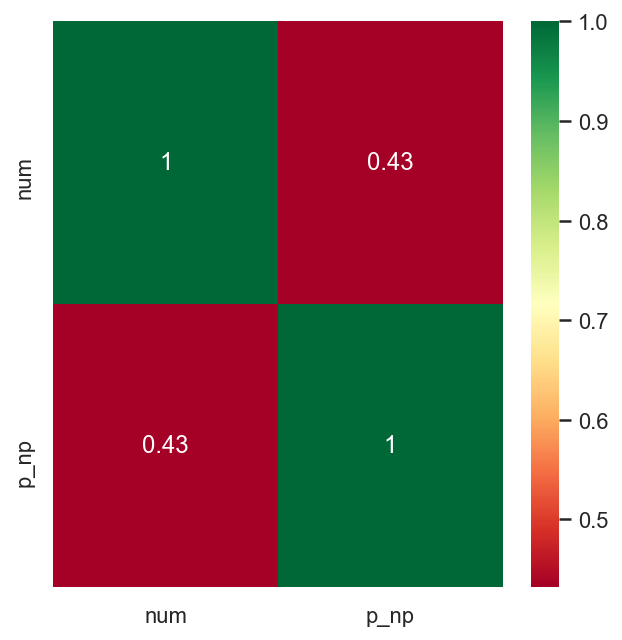

In [166]:

X = bbbp_df.iloc[:,0:2]  #independent columns
y = bbbp_df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = bbbp_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(bbbp_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [107]:
import deepchem as dc
from deepchem.molnet.load_function.molnet_loader import TransformerGenerator, _MolnetLoader
from deepchem.data import Dataset

In [108]:
bbbp_data = dc.molnet.load_bbbp(splitter='scaffold')

[00:24:23] Explicit valence for atom # 1 N, 4, is greater than permitted
Failed to featurize datapoint 59, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
[00:24:23] WARNING: not removing hydrogen atom without neighbors
[00:24:23] Explicit valence for atom # 6 N, 4, is greater than permitted
Failed to featurize datapoint 61, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
[00:24:23] WARNING: not removing hydrogen atom without neighbors
[00:24:24] WARNING: not removing hydrogen atom without neighbors
[00:24:24] WARNING: not removing hydrogen ato

In [109]:
len(bbbp_data[1][1].ids)

204

In [110]:
bbbp_data[1][1].ids

array(['[H+].C2=C1C(OC(=NC1=CC=C2Cl)NCC)(C3=CC=CC=C3)C.[Cl-]',
       'C1=CC=CC2=C1C(C3=C(N(C)C2=O)C=CC=C3)OCC',
       'C1=C(Cl)C=CC3=C1C(C2=CC=CC=C2)SC(=N3)NCC',
       'C1=CC=CC3=C1C4=C(C2=C(C=CC=C2)N3C)CCN(CC4)C',
       'C3=C(OC2C1(NC(=O)C(O1)C)CCCC2)C=CC=C3Cl',
       '[C@@H]1([C@@H]([C@H]2C=C[C@@H]1C2)C(N(CC)CC)=O)C(N(CC)CC)=O',
       'C1=CC=CC=C1CN(C2CC2)C(OCC)=O',
       'C3=C(N2CCN(CC(COC1=CC(=C(OC)C(=C1)OC)OC)O)CC2)C(=CC=C3)OC',
       'C1=C(C2=C(C=C1)OCCO2)N3CCNCC3',
       'C1=C(C2=C(C=C1)C=CO2)N5CCN(CC3=CC=C([NH]3)C4=CC=C(C=C4)F)CC5',
       'C1=CC(=CC3=C1\\C(C2=CC=CC=C2N3)=C/CN(CC)CC)Cl',
       'C2=C(N1N=C(C)CC1=O)C=CC=C2',
       '[C@H]2(N(C1=CC=C(C(=C1)Cl)Cl)C(CC)=O)[C@@H](CCC2)N(C)C',
       'C(N1C(CCC1)=O)C(NNC(CN2C(CCC2)=O)=O)=O',
       'C1=C(C(F)(F)F)C=CC3=C1N(C2=C(C=CC=C2)S3)CCCN5CCC(C(C4=CC=C(F)C=C4)=O)CC5',
       'C1=CC=C3C(=C1OC(C2=CC=CS2)CCNC)C=CC=C3',
       'C1=CC=CC=C1C2(C(CN(C2=O)CC)CCN3CCOCC3)C4=CC=CC=C4',
       'C4=C(CCNC(C12CC3CC(C1)CC(C2)C3)=O)C=C

In [225]:
smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
mol = Chem.MolFromSmiles(smiles)
fingerPrint = RDKFingerprint(mol)
np.array(fingerPrint)

array([1, 1, 0, ..., 0, 0, 1])

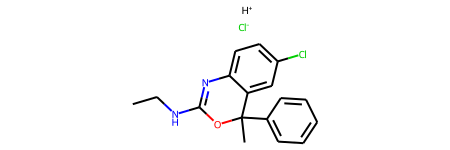

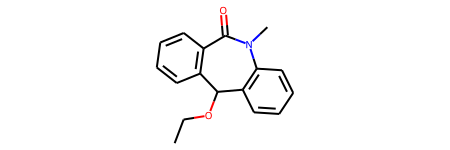

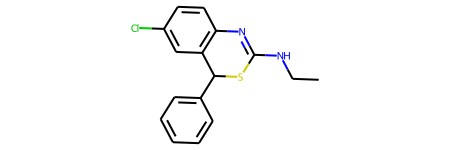

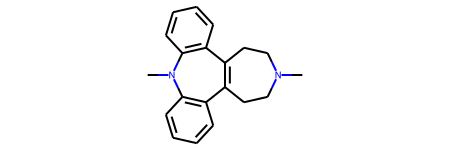

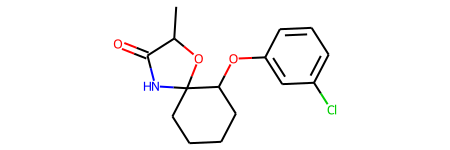

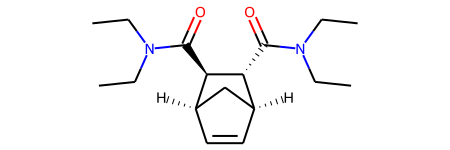

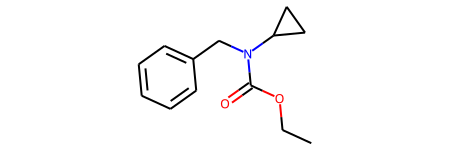

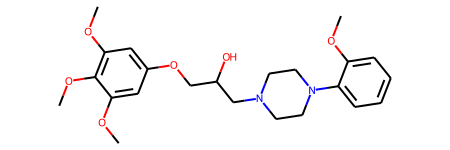

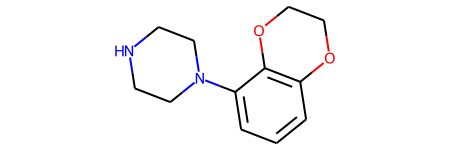

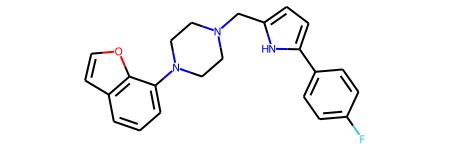

In [226]:
smile = bbbp_data[1][1].ids
fig_prints = []
for i in range(len(smile)):
    fig_prints.append(Chem.MolFromSmiles(smile[i]))
for i in range(10):
    display(fig_prints[i])

In [112]:
fp_array = bbbp_data[1][0].X
y = bbbp_data[1][0].y
print(len(fp_array), len(y))

1631 1631


In [113]:
fp_test_array = bbbp_data[1][1].X
y_test = bbbp_data[1][1].y
print(len(fp_test_array), len(y_test))

204 204


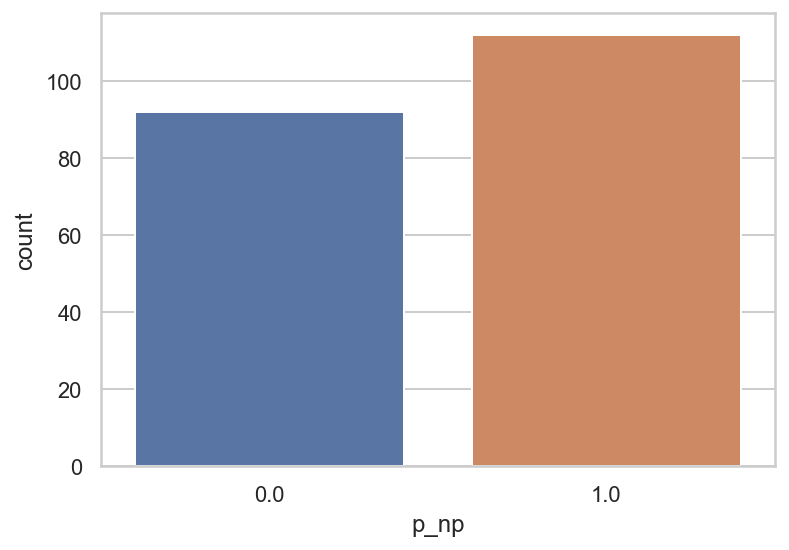

In [114]:
import seaborn as sns
sns.countplot(pd.DataFrame(y_test, columns = ['p_np'])['p_np'])
plt.show()

We can see from above that the count of p_np for values of 0 and 1 are close to each other, so the classes are balanced

# Lets start splitting the data by k-fold cross validation 

In [120]:
# Use this shuffled data for k-fold cv
from sklearn.metrics import average_precision_score

def k_fold_generator(X, y, n_folds, model, model_name): # n_folds can be 5 folds or any value

  # Shuffle data first
    X, y =  shuffle(X, y)
  
    fold_inx_start = 0
    fold_inx_end = int(len(X)/n_folds)

    train_scores = []
    valid_scores = []

    for i in range(n_folds):
        train_x_fold =  np.concatenate( (X[:fold_inx_start, :], X[fold_inx_end:, :]), axis = 0 )
        train_y_fold = np.concatenate( (y[:fold_inx_start, :], y[fold_inx_end:, :]), axis = 0 )

        valid_x_fold = X[fold_inx_start:fold_inx_end, :]
        valid_y_fold = y[fold_inx_start:fold_inx_end, :]

        model.fit(train_x_fold, train_y_fold)

        train_preds = model.predict(train_x_fold)
        valid_preds = model.predict(valid_x_fold)


        train_scores.append( average_precision_score(train_y_fold, train_preds) )
        valid_scores.append( average_precision_score(valid_y_fold, valid_preds) )

    
        fold_inx_start = fold_inx_end
        fold_inx_end = fold_inx_start + int(len(X)/n_folds)
    

    return train_scores, valid_scores, model

# LogisticRegression Model

In [121]:
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = "l2", C = 0.5)
train_scores, valid_scores, lr = k_fold_generator(fp_array, y, 5, lr, 'lr')
model_scores = pd.DataFrame(columns = ['Model', 'Validation fold 1 Score', 'Validation fold 2 Score', 'Validation fold 3 Score', 'Validation fold 4 Score', 'Validation fold 5 Score', 'Mean AUPR Score'])

print('Mean training scores', np.mean(train_scores), ',  Mean validation scores', np.mean(valid_scores))

Mean training scores 0.9711439596395174 ,  Mean validation scores 0.9243050261161452


In [122]:
# Add validation fold values to table
model_scores = model_scores.append({'Model': 'Logistic Regression', 'Validation fold 1 Score': valid_scores[0], 'Validation fold 2 Score': valid_scores[1], 'Validation fold 3 Score': valid_scores[2], 'Validation fold 4 Score': valid_scores[3], 'Validation fold 5 Score': valid_scores[4], 'Mean AUPR Score': np.mean(valid_scores)}, ignore_index = True)


In [123]:
print(classification_report(lr.predict(fp_test_array), y_test))

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87        71
         1.0       1.00      0.84      0.91       133

    accuracy                           0.90       204
   macro avg       0.89      0.92      0.89       204
weighted avg       0.92      0.90      0.90       204



Text(54.25999999999999, 0.5, 'True Label')

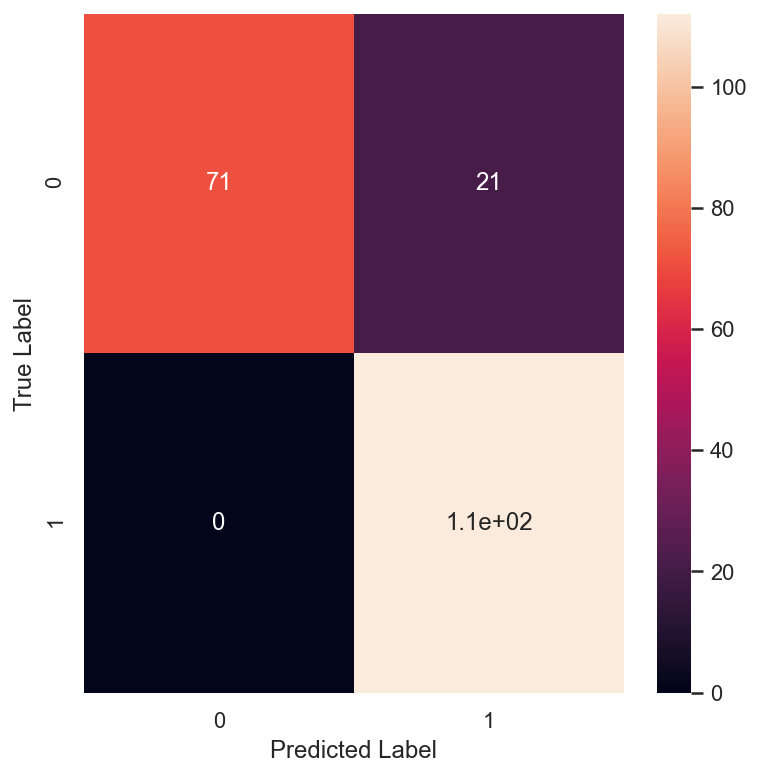

In [124]:
# Confusion matrix 
cm = confusion_matrix(y_test, lr.predict(fp_test_array))
df_cm = pd.DataFrame(cm, index = [0, 1], columns = [0,1])
plt.figure(figsize=(6, 6))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# LogisticRegression with Lasso

In [125]:
ls = LogisticRegression(penalty = 'l1', C=0.01, solver='liblinear') # L1 is lasso
train_scores, valid_scores, ls = k_fold_generator(fp_array, y, 5, ls, 'ls')

print('Mean training scores', np.mean(train_scores), ',  Mean validation scores', np.mean(valid_scores))

Mean training scores 0.8222222222222222 ,  Mean validation scores 0.8220858895705522


In [126]:
print(ls.coef_)
print(ls.intercept_)

[[0. 0. 0. ... 0. 0. 0.]]
[1.08740482]


In [127]:
### Coefficients of almost features is 0 - this is probably because of large penalizing. Since most features are discarded (weights go to 0) the predictions hardly change. To avoid this, reduce C value ( increase C value which is inverse of alpha, to reduce penalizing).

In [128]:
# Updated C value
ls = LogisticRegression(penalty = 'l1', C=0.5, solver='liblinear') # L1 is lasso
train_scores, valid_scores, ls = k_fold_generator(fp_array, y, 5, ls, 'ls')

print('Mean training scores', np.mean(train_scores), ',  Mean validation scores', np.mean(valid_scores))

Mean training scores 0.9385876215038907 ,  Mean validation scores 0.9172914842510052


In [129]:
print(ls.coef_)
print(ls.intercept_)

[[0. 0. 0. ... 0. 0. 0.]]
[3.41162366]


In [130]:
# Add validation fold values to table
model_scores = model_scores.append({'Model': 'Lasso Classifier (L1)', 'Validation fold 1 Score': valid_scores[0], 'Validation fold 2 Score': valid_scores[1], 'Validation fold 3 Score': valid_scores[2], 'Validation fold 4 Score': valid_scores[3], 'Validation fold 5 Score': valid_scores[4], 'Mean AUPR Score': np.mean(valid_scores)}, ignore_index = True)


In [131]:
ls_predictions = ls.predict(fp_test_array)

In [132]:
print(classification_report(ls_predictions, y_test))

              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85        73
         1.0       0.97      0.83      0.90       131

    accuracy                           0.88       204
   macro avg       0.87      0.90      0.87       204
weighted avg       0.90      0.88      0.88       204



Text(54.25999999999999, 0.5, 'True Label')

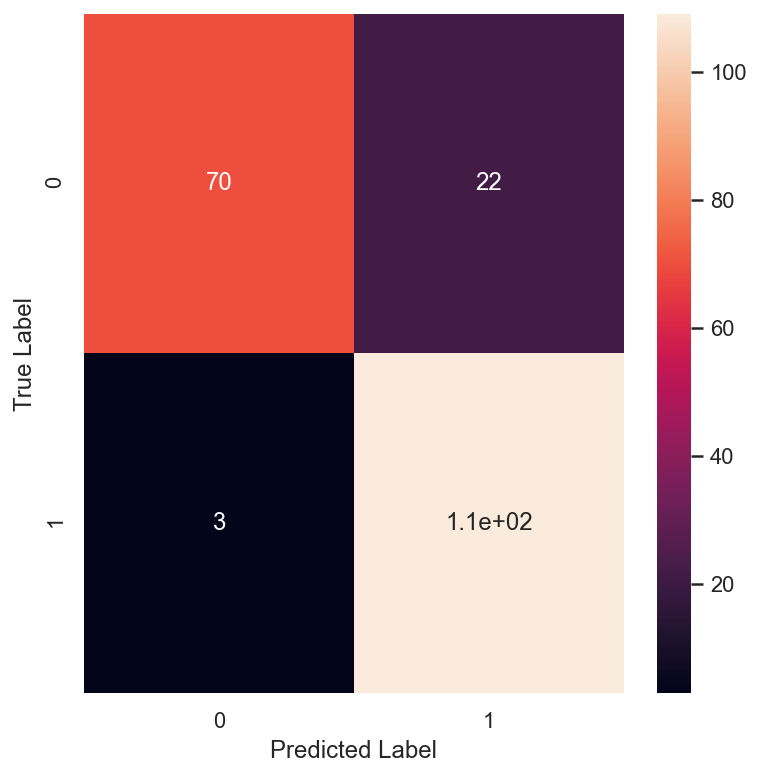

In [133]:
# Confusion matrix 
cm = confusion_matrix(y_test, ls_predictions)
df_cm = pd.DataFrame(cm, index = [0, 1], columns = [0,1])
plt.figure(figsize=(6, 6))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# SVC Model

In [134]:
from sklearn.svm import SVC
svc = SVC(C = 0.8, kernel = 'rbf' ) # Adding small regularization parameter and RBF kernel for svc

train_scores, valid_scores, svc = k_fold_generator(fp_array, y, 5, svc, 'svc')

print('Mean training scores', np.mean(train_scores), ',  Mean validation scores', np.mean(valid_scores))

Mean training scores 0.9380414575234244 ,  Mean validation scores 0.909199596775173


In [135]:
# Add validation fold values to table
model_scores = model_scores.append({'Model': 'Support Vector Classifier', 'Validation fold 1 Score': valid_scores[0], 'Validation fold 2 Score': valid_scores[1], 'Validation fold 3 Score': valid_scores[2], 'Validation fold 4 Score': valid_scores[3], 'Validation fold 5 Score': valid_scores[4], 'Mean AUPR Score': np.mean(valid_scores)}, ignore_index = True)


In [136]:
svc_predictions = svc.predict(fp_test_array)

print(classification_report(svc_predictions, y_test))

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        66
         1.0       1.00      0.81      0.90       138

    accuracy                           0.87       204
   macro avg       0.86      0.91      0.87       204
weighted avg       0.91      0.87      0.88       204



Text(54.25999999999999, 0.5, 'True Label')

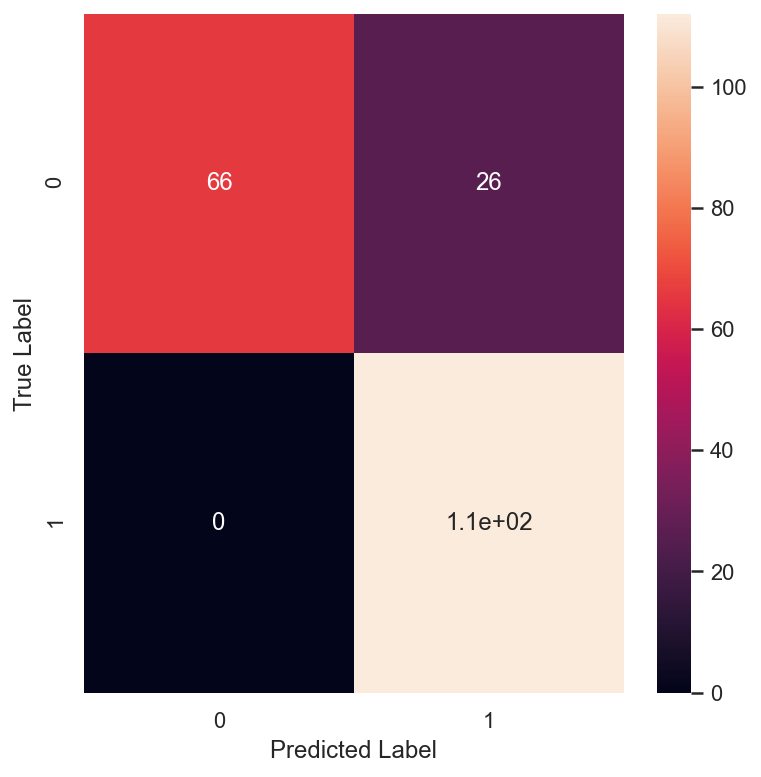

In [137]:
# Confusion matrix 
cm = confusion_matrix(y_test, svc_predictions)
df_cm = pd.DataFrame(cm, index = [0, 1], columns = [0,1])
plt.figure(figsize=(6, 6))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Gaussian Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train_scores, valid_scores, gnb = k_fold_generator(fp_array, y, 5, gnb, 'gnb')

print('Mean training scores', np.mean(train_scores), ',  Mean validation scores', np.mean(valid_scores))

Mean training scores 0.9143307211931404 ,  Mean validation scores 0.8555428984731398


In [139]:
# Add validation fold values to table
model_scores = model_scores.append({'Model': 'Gaussian Naive Bayes Classifier', 'Validation fold 1 Score': valid_scores[0], 'Validation fold 2 Score': valid_scores[1], 'Validation fold 3 Score': valid_scores[2], 'Validation fold 4 Score': valid_scores[3], 'Validation fold 5 Score': valid_scores[4], 'Mean AUPR Score': np.mean(valid_scores)}, ignore_index = True)


In [140]:
gnb_predictions = gnb.predict(fp_test_array)

print(classification_report(gnb_predictions, y_test))

              precision    recall  f1-score   support

         0.0       0.39      0.44      0.41        82
         1.0       0.59      0.54      0.56       122

    accuracy                           0.50       204
   macro avg       0.49      0.49      0.49       204
weighted avg       0.51      0.50      0.50       204



Text(54.25999999999999, 0.5, 'True Label')

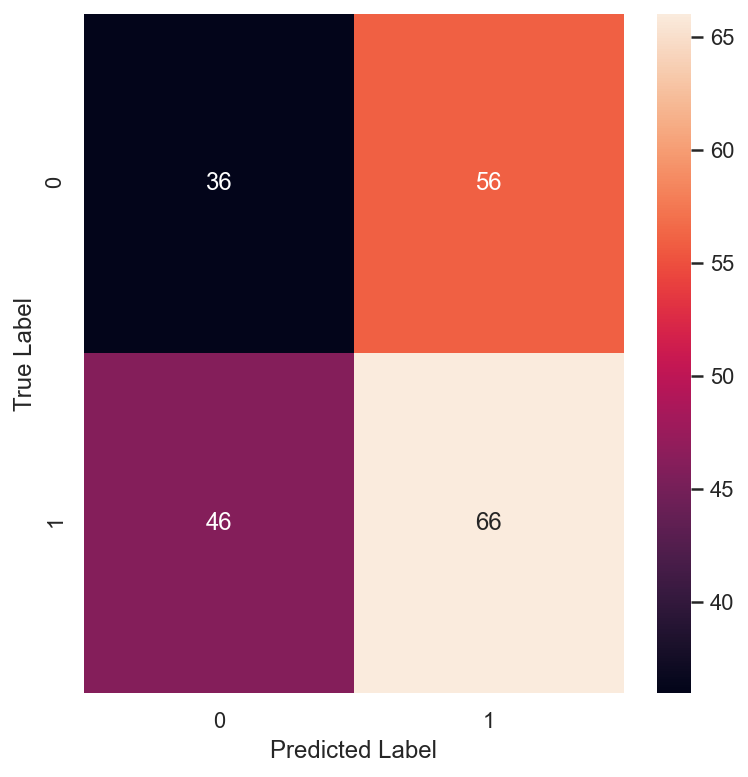

In [141]:
# Confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions)
df_cm = pd.DataFrame(cm, index = [0, 1], columns = [0,1])
plt.figure(figsize=(6, 6))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [142]:
model_scores

,Model,Validation fold 1 Score,Validation fold 2 Score,Validation fold 3 Score,Validation fold 4 Score,Validation fold 5 Score,Mean AUPR Score
0,Logistic Regression,0.912470,0.922513,0.928506,0.937749,0.920286,0.924305
1,Lasso Classifier (L1),0.928900,0.906990,0.920275,0.913917,0.916375,0.917291
2,Support Vector Classifier,0.900022,0.913080,0.909301,0.895114,0.928481,0.909200
3,Gaussian Naive Bayes Classifier,0.843203,0.884258,0.878238,0.826347,0.845667,0.855543


Descriptors dataframe contains 1625 molecular descriptors (including 3D descriptors) generated on the NCI database using Mordred python module

Lets examine the Descriptors dataframe to how the molecules in the data predict the permeability of the drug.

# Lets examine the Descriptors dataframe to how the molecules in the data predict the permeability of the drug.

In [172]:
import pandas as pd

bbbp_descriptors_df = pd.read_csv('/Users/jagan/Downloads/BBBP_Descriptors/BBBP_Descriptors_df.csv')

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [182]:
print(bbbp_descriptors_df.shape)
bbbp_descriptors_df.head()
x=bbbp_descriptors_df.pop('p_np')
bbbp_descriptors_df.insert(1825, 'p_np', column_to_move)
bbbp_descriptors_df.head()

(2039, 1826)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,p_np
0,14.389425,11.808563,0,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,52.719904,294.126082,7.173807,1900000792,25,92.0,103.0,divide by zero encountered in power (mZagreb1),4.305556,1
1,16.809162,13.974216,0,0,27.07079790976892,2.2954078760731984,4.590815752146396,27.07079790976892,1.176991213468214,4.006826078023401,...,56.206491,359.141884,7.182838,1492,28,106.0,114.0,9.506944444444443,5.319444,1
2,20.758034,16.164169,1,1,33.465822016594636,2.5785233443199886,5.157046688639976,33.465822016594636,1.2871470006382553,4.212470854925482,...,61.857420,361.143784,7.850952,1484,51,146.0,180.0,9.333333333333334,5.527778,1
3,15.775129,12.193243,0,1,26.569834753519054,2.2810418592150574,4.562083718430117,26.569834753519054,1.2652302263580502,3.9370258695924103,...,53.624898,290.199428,6.174456,1158,24,98.0,106.0,6.194444444444445,4.833333,1
4,23.095142,19.875288,1,0,36.20647450941663,2.6329498486229084,5.121946098165539,36.20647450941663,1.2484991210143666,4.326727233654511,...,82.182989,435.065569,9.256714,2212,50,164.0,203.0,11.395833333333332,6.097222,1


# Finding correlation between the columns

In [213]:
correlation=bbbp_descriptors_df.corr()
l=correlation['p_np']
ll=[]

for i in l:
    if i>0:
        ll.append(i)
ll.sort()

print("n_np is highly correlated with",l[l==ll[-2]])

print("Top 10 features that have decisive role on permeability are",)

for i in range(-11,-1,1):
    
    print(l[l==ll[i]])

n_np is highly correlated with ATSC1c    0.50154
Name: p_np, dtype: float64
Top 10 features that have decisive role on permeability are
MATS1are    0.310021
Name: p_np, dtype: float64
MATS1pe    0.315559
Name: p_np, dtype: float64
AATSC1c    0.333928
Name: p_np, dtype: float64
Lipinski    0.334814
Name: p_np, dtype: float64
SsssCH    0.360272
Name: p_np, dtype: float64
SdssC    0.385012
Name: p_np, dtype: float64
ATSC1pe    0.40103
Name: p_np, dtype: float64
ATSC1se    0.410719
Name: p_np, dtype: float64
ATSC1are    0.4139
Name: p_np, dtype: float64
ATSC1c    0.50154
Name: p_np, dtype: float64


In [220]:
#Correlation of all columns 
bbbp_descriptors_df.corr()



,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,p_np
ABC,1.000000,0.985616,0.129367,0.154078,0.259233,0.259231,0.958944,0.996899,0.159362,0.314471,...,0.747482,0.897807,0.981748,-0.101157,0.236842,0.956784,0.995069,0.981897,0.987636,-0.314142
ABCGG,0.985616,1.000000,0.155547,0.128688,0.188533,0.188625,0.948840,0.986052,0.136782,0.262403,...,0.767142,0.904116,0.976738,-0.090605,0.232366,0.954588,0.983171,0.972725,0.977035,-0.344348
nAcid,0.129367,0.155547,1.000000,0.017861,0.032844,0.031539,0.058016,0.149079,-0.059858,-0.013780,...,0.094680,0.146132,0.181028,0.175504,0.102040,0.053085,0.116876,0.103635,0.138768,-0.309663
nBase,0.154078,0.128688,0.017861,1.000000,0.120338,0.115536,0.197635,0.162873,0.056761,0.062882,...,0.114739,0.095631,0.156091,-0.124933,0.011834,0.101619,0.137825,0.121826,0.165607,-0.074009
nAromAtom,0.259233,0.188533,0.032844,0.120338,1.000000,0.998078,0.131256,0.250706,-0.045798,0.046411,...,0.195879,0.212747,0.213220,0.017625,-0.020239,0.131150,0.225857,0.194939,0.263376,-0.001848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPol,0.956784,0.954588,0.053085,0.101619,0.131150,0.132505,0.917577,0.944887,0.207189,0.338335,...,0.777978,0.874144,0.925053,-0.113322,0.209402,1.000000,0.976614,0.987598,0.923451,-0.271264
Zagreb1,0.995069,0.983171,0.116876,0.137825,0.225857,0.226590,0.947947,0.986651,0.185550,0.327996,...,0.775663,0.910845,0.970322,-0.100431,0.231977,0.976614,1.000000,0.995737,0.970378,-0.306156
Zagreb2,0.981897,0.972725,0.103635,0.121826,0.194939,0.196359,0.930267,0.968987,0.208048,0.336705,...,0.794826,0.914790,0.950781,-0.102849,0.224068,0.987598,0.995737,1.000000,0.947334,-0.295054
mZagreb2,0.987636,0.977035,0.138768,0.165607,0.263376,0.262894,0.966018,0.995097,0.124828,0.290884,...,0.687423,0.857614,0.981344,-0.114053,0.240457,0.923451,0.970378,0.947334,1.000000,-0.322571


In [26]:
# function to coerce all data types to numeric

def coerce_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

In [27]:
coerce_to_numeric(bbbp_descriptors_df, bbbp_descriptors_df.columns)
bbbp_descriptors_df.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,14.389425,11.808563,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,9.604475,52.719904,294.126082,7.173807,1900000792,25,92.0,103.0,NaN,4.305556
1,16.809162,13.974216,0,0,27.070798,2.295408,4.590816,27.070798,1.176991,4.006826,...,9.620262,56.206491,359.141884,7.182838,1492,28,106.0,114.0,9.506944,5.319444
2,20.758034,16.164169,1,1,33.465822,2.578523,5.157047,33.465822,1.287147,4.212471,...,10.513498,61.857420,361.143784,7.850952,1484,51,146.0,180.0,9.333333,5.527778
3,15.775129,12.193243,0,1,26.569835,2.281042,4.562084,26.569835,1.265230,3.937026,...,9.441849,53.624898,290.199428,6.174456,1158,24,98.0,106.0,6.194444,4.833333
4,23.095142,19.875288,1,0,36.206475,2.632950,5.121946,36.206475,1.248499,4.326727,...,10.721173,82.182989,435.065569,9.256714,2212,50,164.0,203.0,11.395833,6.097222


In [28]:
bbbp_descriptors_df = bbbp_descriptors_df.fillna(0)
bbbp_descriptors_df.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,14.389425,11.808563,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.604475,52.719904,294.126082,7.173807,1900000792,25,92.0,103.0,0.000000,4.305556
1,16.809162,13.974216,0,0,27.070798,2.295408,4.590816,27.070798,1.176991,4.006826,...,9.620262,56.206491,359.141884,7.182838,1492,28,106.0,114.0,9.506944,5.319444
2,20.758034,16.164169,1,1,33.465822,2.578523,5.157047,33.465822,1.287147,4.212471,...,10.513498,61.857420,361.143784,7.850952,1484,51,146.0,180.0,9.333333,5.527778
3,15.775129,12.193243,0,1,26.569835,2.281042,4.562084,26.569835,1.265230,3.937026,...,9.441849,53.624898,290.199428,6.174456,1158,24,98.0,106.0,6.194444,4.833333
4,23.095142,19.875288,1,0,36.206475,2.632950,5.121946,36.206475,1.248499,4.326727,...,10.721173,82.182989,435.065569,9.256714,2212,50,164.0,203.0,11.395833,6.097222


# Lets do Scaling and Principle Component Analysis

In [31]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
import pickle
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from keras.models import Sequential, Model
from keras import optimizers, regularizers, initializers
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend as K
import tensorflow as tf
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [32]:
bbbp_scaler1 = StandardScaler()
bbbp_scaler1.fit(bbbp_descriptors_df.values)
bbbp_descriptors_df = pd.DataFrame(bbbp_scaler1.transform(bbbp_descriptors_df.values),
                                   columns=bbbp_descriptors_df.columns)

In [33]:
NCA1 = 100
NCA2 = 50
DROPRATE = 0.2
EP = 20
BATCH_SIZE = 128
VAL_RATIO = 0.1
TEST_RATIO = 0.1

In [37]:
nca = NCA1
cn = ['col'+str(x) for x in range(nca)]

In [38]:
bbbp_transformer1 = KernelPCA(n_components=nca, kernel='rbf', n_jobs=-1)
bbbp_transformer1.fit(bbbp_descriptors_df.values)
bbbp_descriptors_df = pd.DataFrame(bbbp_transformer1.transform(bbbp_descriptors_df.values),
                                   columns=cn)
print(bbbp_descriptors_df.shape)
bbbp_descriptors_df.head()

(2039, 100)


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99
0,0.111545,0.392873,-0.003267,-0.267306,0.231641,0.444553,-0.071575,0.110802,0.047952,0.160705,...,-0.025859,-0.018511,0.000904,-0.004893,0.036374,0.004525,-0.021115,0.004158,0.025874,-0.019096
1,-0.203233,-0.044515,0.076816,-0.029671,-0.210262,0.099158,0.029858,-0.013679,0.007349,-0.064774,...,-0.004137,0.017204,0.055856,0.005271,0.017609,-0.027526,-0.016759,-0.036706,-0.062104,-0.012252
2,-0.025130,-0.191458,-0.203020,0.068156,0.073111,-0.027518,-0.036239,0.146615,0.232318,-0.094930,...,-0.007180,0.028021,-0.020768,0.010863,0.068034,0.010748,0.004291,0.022947,-0.026410,0.000016
3,-0.359887,-0.032916,0.080973,-0.096383,-0.261437,0.124236,-0.007101,-0.017018,0.034251,0.041853,...,0.006608,0.021682,0.016685,0.010577,0.003553,-0.004392,0.000823,0.023478,-0.004957,0.013025
4,0.191021,-0.175647,-0.227526,0.267293,0.041106,0.061673,-0.242964,-0.157042,-0.121486,-0.159706,...,0.034672,0.024127,0.017033,0.010355,0.001940,0.030673,-0.028420,0.027568,0.015075,0.003421


In [40]:
X_train, X_test, y_train, y_test = train_test_split(bbbp_descriptors_df.values, bbbp_df['p_np'].values.flatten(), 
                                                    test_size=TEST_RATIO, 
                                                    random_state=42,stratify=bbbp_df['p_np'].values.flatten())

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      test_size=VAL_RATIO, 
                                                      random_state=42,stratify=y_train)

In [42]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [43]:
def Find_Optimal_threshold(target, predicted):
    target = target.reshape(-1,1)
    predicted = predicted.reshape(-1,1)
    
    rng = np.arange(0.0, 0.99, 0.001)
    f1s = np.zeros((rng.shape[0],predicted.shape[1]))
    for i in range(0,predicted.shape[1]):
        for j,t in enumerate(rng):
            p = np.array((predicted[:,i])>t, dtype=np.int8)
            scoref1 = f1_score(target[:,i], p, average='binary')
            f1s[j,i] = scoref1
            
    threshold = np.empty(predicted.shape[1])
    for i in range(predicted.shape[1]):
        threshold[i] = rng[int(np.where(f1s[:,i] == np.max(f1s[:,i]))[0][0])]
        
    return threshold

In [44]:
parameters = {'kernel':['sigmoid', 'rbf'], 'C':[1,0.5], 'gamma':[1/nca,1/np.sqrt(nca)],'probability':[True]}
bbbp_svc = GridSearchCV(SVC(random_state=23,class_weight='balanced'), parameters, cv=5, scoring='roc_auc',n_jobs=-1)

In [45]:
result = bbbp_svc.fit(X_train, y_train)

In [46]:
print(result.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1, probability=True, random_state=23)


In [47]:
print(result.best_score_)

0.8719306019701276


In [48]:
pred = bbbp_svc.predict_proba(X_valid)

In [49]:
bbbp_svc_calib = CalibratedClassifierCV(bbbp_svc, cv='prefit')
bbbp_svc_calib.fit(X_valid, y_valid)

CalibratedClassifierCV(base_estimator=GridSearchCV(cv=5,
                                                   estimator=SVC(class_weight='balanced',
                                                                 random_state=23),
                                                   n_jobs=-1,
                                                   param_grid={'C': [1, 0.5],
                                                               'gamma': [0.01,
                                                                         0.1],
                                                               'kernel': ['sigmoid',
                                                                          'rbf'],
                                                               'probability': [True]},
                                                   scoring='roc_auc'),
                       cv='prefit')

In [50]:
pred = bbbp_svc_calib.predict_proba(X_valid)
pred = pred[:,1]
pred_svc_t = np.copy(pred)

In [51]:
threshold = Find_Optimal_threshold(y_valid, pred)
print(threshold)

[0.383]


In [52]:
pred = bbbp_svc_calib.predict(X_test)
f1_score(y_test,pred)

0.9102167182662538

In [53]:
pred = bbbp_svc_calib.predict_proba(X_test)
roc_auc_score(y_test,pred[:,1])

0.9154647435897436

In [54]:
pred = pred[:,1]
pred_svc = np.copy(pred)
pred[pred<=threshold] = 0
pred[pred>threshold] = 1
svc_score = f1_score(y_test,pred)
print(svc_score)

0.915151515151515


In [55]:
y = np.array(bbbp_descriptors_df.loc[23].values).reshape(1, -1)
result = bbbp_svc.predict(y)
prob = bbbp_svc.predict_proba(y)
print(result)
print(prob)
print(int(prob[:,1]>threshold))

[0]
[[0.44247933 0.55752067]]
1


# Neural Network Model

In [56]:
bbbp_model = Sequential()
bbbp_model.add(Dense(128, input_dim=bbbp_descriptors_df.shape[1], 
                     kernel_initializer='he_uniform'))
bbbp_model.add(BatchNormalization())
bbbp_model.add(Activation('tanh'))
bbbp_model.add(Dropout(rate=DROPRATE))
bbbp_model.add(Dense(64,kernel_initializer='he_uniform'))
bbbp_model.add(BatchNormalization())
bbbp_model.add(Activation('tanh'))
bbbp_model.add(Dropout(rate=DROPRATE))
bbbp_model.add(Dense(32,kernel_initializer='he_uniform'))
bbbp_model.add(BatchNormalization())
bbbp_model.add(Activation('tanh'))
bbbp_model.add(Dropout(rate=DROPRATE))
bbbp_model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [57]:
bbbp_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [58]:
checkpoint = ModelCheckpoint('bbbp_model.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='min')

In [59]:
unique_classes = np.unique(bbbp_df['p_np'].values.flatten())
class_weights = class_weight.compute_class_weight('balanced',unique_classes,
                                                  bbbp_df['p_np'].values.flatten())
class_weights = {unique_classes[0]:class_weights[0],unique_classes[1]:class_weights[1]}

In [60]:
hist = bbbp_model.fit(X_train, y_train, 
                      validation_data=(X_valid,y_valid),epochs=EP, batch_size=BATCH_SIZE, 
                      class_weight=class_weights ,callbacks=[checkpoint])

Epoch 1/20
 1/13 [=>............................] - ETA: 22s - loss: 0.7719 - accuracy: 0.5391
Epoch 1: val_loss improved from inf to 0.58582, saving model to bbbp_model.h5
13/13 [==============================] - 2s 41ms/step - loss: 0.6636 - accuracy: 0.5966 - val_loss: 0.5858 - val_accuracy: 0.7337
Epoch 2/20
10/13 [======================>.......] - ETA: 0s - loss: 0.5424 - accuracy: 0.6930
Epoch 2: val_loss improved from 0.58582 to 0.53519, saving model to bbbp_model.h5
13/13 [==============================] - 0s 12ms/step - loss: 0.5214 - accuracy: 0.7020 - val_loss: 0.5352 - val_accuracy: 0.7554
Epoch 3/20
10/13 [======================>.......] - ETA: 0s - loss: 0.4575 - accuracy: 0.7484
Epoch 3: val_loss improved from 0.53519 to 0.49317, saving model to bbbp_model.h5
13/13 [==============================] - 0s 12ms/step - loss: 0.4567 - accuracy: 0.7529 - val_loss: 0.4932 - val_accuracy: 0.7935
Epoch 4/20
 7/13 [===============>..............] - ETA: 0s - loss: 0.4640 - accuracy

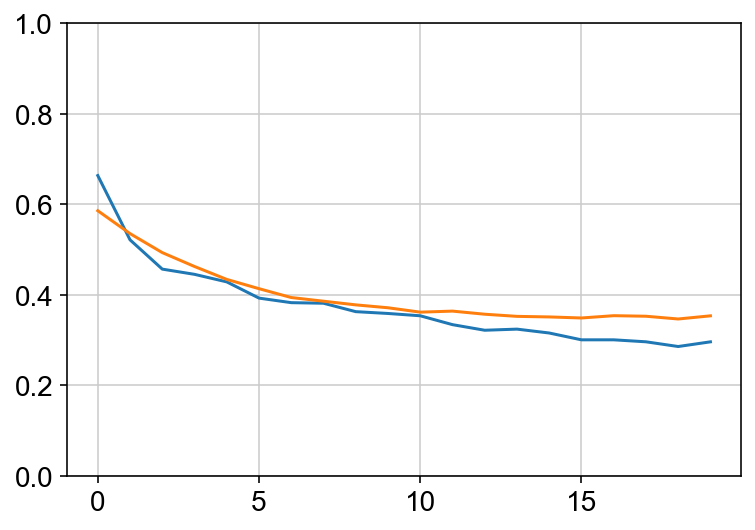

In [61]:
plt.ylim(0., 1.0)
plt.plot(hist.epoch, hist.history["loss"], label="Train loss")
plt.plot(hist.epoch, hist.history["val_loss"], label="Valid loss")

In [62]:
bbbp_model.load_weights('bbbp_model.h5')

In [63]:
pred = bbbp_model.predict(X_valid)
pred_nn_t = np.copy(pred)

In [64]:
threshold = Find_Optimal_threshold(y_valid, pred)
print(threshold)

[0.227]


In [65]:
pred = bbbp_model.predict(X_test)
pred_nn = np.copy(pred)
roc_auc_score(y_test,pred)

0.9026442307692307

In [66]:
pred[pred<=threshold] = 0
pred[pred>threshold] = 1
nn_score = f1_score(y_test,pred)
print(nn_score)

0.9207317073170732


In [67]:
prob = bbbp_model.predict(y)
print(prob)
print(int(prob>=threshold))

[[0.21266645]]
0


# Gradient Boosting of Keras Model with SVC

In [68]:
inp = bbbp_model.input
out = bbbp_model.layers[-2].output
bbbp_model_gb = Model(inp, out)

In [69]:
X_train = bbbp_model_gb.predict(X_train)
X_valid = bbbp_model_gb.predict(X_valid)
X_test = bbbp_model_gb.predict(X_test)

In [70]:
data = np.concatenate((X_train,X_test,X_valid),axis=0)

In [71]:
bbbp_scaler2 = StandardScaler()
bbbp_scaler2.fit(data)
X_train = bbbp_scaler2.transform(X_train)
X_valid = bbbp_scaler2.transform(X_valid)
X_test = bbbp_scaler2.transform(X_test)

In [72]:
data = np.concatenate((X_train,X_test,X_valid),axis=0)

In [73]:
nca = NCA2

In [74]:
bbbp_transformer2 = KernelPCA(n_components=nca, kernel='rbf', n_jobs=-1)
bbbp_transformer2.fit(data)
X_train = bbbp_transformer2.transform(X_train)
X_valid = bbbp_transformer2.transform(X_valid)
X_test = bbbp_transformer2.transform(X_test)

In [75]:
nca = X_train.shape[1]
parameters = {'kernel':['sigmoid', 'rbf'], 'C':[1,0.5], 'gamma':[1/nca,1/np.sqrt(nca)],'probability':[True]}
bbbp_svc_gb = GridSearchCV(SVC(random_state=23,class_weight='balanced'), parameters, cv=5, scoring='roc_auc',n_jobs=-1)

In [76]:
result = bbbp_svc_gb.fit(X_train, y_train)

In [77]:
print(result.best_estimator_)

SVC(C=0.5, class_weight='balanced', gamma=0.02, probability=True,
    random_state=23)


In [78]:
print(result.best_score_)

0.9451653400764073


In [79]:
pred = bbbp_svc_gb.predict_proba(X_valid)

In [80]:
bbbp_svc_gb_calib = CalibratedClassifierCV(bbbp_svc_gb, cv='prefit')
bbbp_svc_gb_calib.fit(X_valid, y_valid)

CalibratedClassifierCV(base_estimator=GridSearchCV(cv=5,
                                                   estimator=SVC(class_weight='balanced',
                                                                 random_state=23),
                                                   n_jobs=-1,
                                                   param_grid={'C': [1, 0.5],
                                                               'gamma': [0.02,
                                                                         0.1414213562373095],
                                                               'kernel': ['sigmoid',
                                                                          'rbf'],
                                                               'probability': [True]},
                                                   scoring='roc_auc'),
                       cv='prefit')

In [81]:
pred = bbbp_svc_gb_calib.predict_proba(X_valid)
pred = pred[:,1]
pred_svc_gb_t = np.copy(pred)

In [82]:
threshold = Find_Optimal_threshold(y_valid, pred)
print(threshold)

[0.294]


In [83]:
pred = bbbp_svc_gb_calib.predict(X_test)
f1_score(y_test,pred)

0.9226006191950465

In [84]:
pred = bbbp_svc_gb_calib.predict_proba(X_test)
roc_auc_score(y_test,pred[:,1])

0.9038461538461539

In [85]:
pred = pred[:,1]
pred_svc_gb = np.copy(pred)
pred[pred<=threshold] = 0
pred[pred>threshold] = 1
svc_gb_score = f1_score(y_test,pred)
print(svc_gb_score)

0.9221556886227544


In [86]:
y = np.array(X_train[23,:])
y = y.reshape(-1, nca)
result = bbbp_svc_gb_calib.predict(y)
prob = bbbp_svc_gb_calib.predict_proba(y)
print(result)
print(prob)
print(int(prob[:,1]>=threshold))

[1]
[[0.05011165 0.94988835]]
1


# Gradient Boosting of Keras Model with XGBoost

In [90]:
parameters = {'learning_rate':[0.05,0.1,0.15],'n_estimators':[75,100,125], 'max_depth':[3,4,5],
               'booster':['gbtree','dart'],'reg_alpha':[0.,0.1,0.05],'reg_lambda':[0.,0.1,0.5,1.]}

bbbp_xgb_gb = GridSearchCV(XGBClassifier(random_state=32), parameters, cv=5, scoring='roc_auc',n_jobs=-1)

In [91]:
result = bbbp_xgb_gb.fit(X_train, y_train)

In [92]:
print(result.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=0, num_parallel_tree=1, random_state=32,
              reg_alpha=0.1, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [93]:
print(result.best_score_)

0.940998815998816


In [94]:
pred = bbbp_xgb_gb.predict_proba(X_valid)

In [95]:
bbbp_xgb_gb_calib = CalibratedClassifierCV(bbbp_xgb_gb, cv='prefit')
bbbp_xgb_gb_calib.fit(X_valid, y_valid)

CalibratedClassifierCV(base_estimator=GridSearchCV(cv=5,
                                                   estimator=XGBClassifier(base_score=None,
                                                                           booster=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           gamma=None,
                                                                           gpu_id=None,
                                                                           importance_type='gain',
                                                                           interaction_constraints=None,
                                                                           learning_rate

In [96]:
pred = bbbp_xgb_gb.predict_proba(X_valid)
pred = pred[:,1]
pred_xgb_gb_t= np.copy(pred)

In [97]:
threshold = Find_Optimal_threshold(y_valid, pred)
print(threshold)

[0.348]


In [98]:
pred = bbbp_xgb_gb_calib.predict(X_test)
f1_score(y_test,pred)

0.9259259259259259

In [99]:
pred = bbbp_xgb_gb_calib.predict_proba(X_test)
roc_auc_score(y_test,pred[:,1])

0.9180021367521367

In [100]:
pred = pred[:,1]
pred_xgb_gb = np.copy(pred)
pred[pred<=threshold] = 0
pred[pred>threshold] = 1
xgb_gb_score = f1_score(y_test,pred)
print(xgb_gb_score)

0.9333333333333333


In [101]:
result = bbbp_xgb_gb_calib.predict(y)
prob = bbbp_xgb_gb_calib.predict_proba(y)
print(result)
print(prob)
print(int(prob[:,1]>=threshold))

[1]
[[0.05323249 0.94676751]]
1


In [102]:
pred = (pred_svc_t+pred_nn_t.flatten()+pred_svc_gb_t+pred_xgb_gb_t)/4

In [103]:
threshold = Find_Optimal_threshold(y_valid, pred)
print(threshold)

[0.202]


In [104]:
pred = (pred_svc+pred_nn.flatten()+pred_svc_gb+pred_xgb_gb)/4
pred[pred<=threshold] = 0
pred[pred>threshold] = 1
ave_score = f1_score(y_test,pred)

[(0.75, 0.98)]

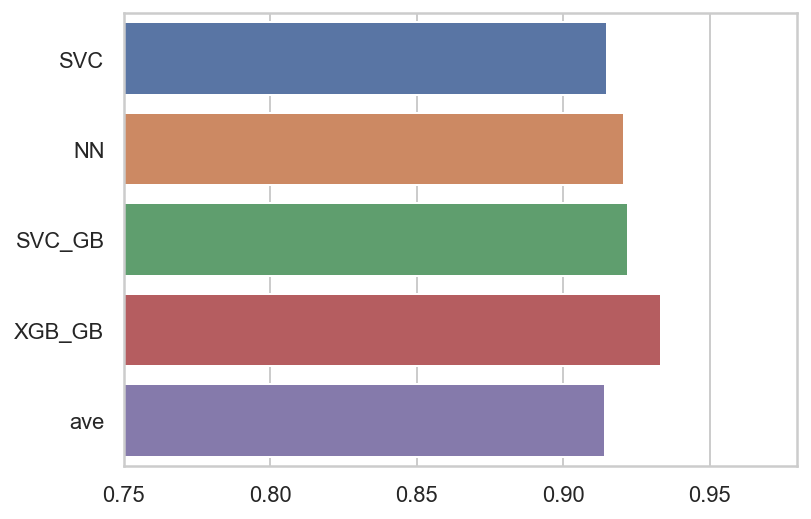

In [106]:
sns.set(style="whitegrid")
ax = sns.barplot(x=[svc_score,nn_score,svc_gb_score,xgb_gb_score,ave_score],
                 y=['SVC','NN','SVC_GB','XGB_GB','ave'])
ax.set(xlim=(0.75, None))